In [1]:
import qiskit as qk

/Users/kevin.krsulichibm.com/q/qiskit-terra/qiskit/__init__.py:78: DeprecationWarning: Using Qiskit with Python 3.5 is deprecated as of the 0.12.0 release. Support for running Qiskit with Python 3.5 will be removed at the Python 3.5 EoL on 09/13/2020.
  "Python 3.5 EoL on 09/13/2020.", DeprecationWarning)


In [2]:
from qiskit.circuit import ReglessQubit, ReglessClbit

In [3]:
qargs = [ReglessQubit() for _ in range(5)]
cargs = [ReglessClbit() for _ in range(1)]

In [4]:
qargs

[ReglessQubit(0x1302d94e0),
 ReglessQubit(0x1302d9160),
 ReglessQubit(0x1302d9710),
 ReglessQubit(0x1302d9550),
 ReglessQubit(0x1302d9828)]

In [5]:
cargs

[ReglessClbit(0x1302d9320)]

In [6]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [7]:
qr = QuantumRegister(bits=qargs)
cr = ClassicalRegister(bits=cargs)

In [8]:
qr

QuantumRegister(5, 'q0')

In [9]:
cr

ClassicalRegister(1, 'c0')

In [10]:
qr[0]

ReglessQubit(0x1302d94e0)

In [11]:
cr[0]

ReglessClbit(0x1302d9320)

In [12]:
qc = qk.QuantumCircuit(qr, cr)

In [13]:
qc.qubits

[ReglessQubit(0x1302d94e0),
 ReglessQubit(0x1302d9160),
 ReglessQubit(0x1302d9710),
 ReglessQubit(0x1302d9550),
 ReglessQubit(0x1302d9828)]

In [14]:
qc.clbits

[ReglessClbit(0x1302d9320)]

In [15]:
qc.qregs

{QuantumRegister(5, 'q0')}

In [16]:
qc.cregs

{ClassicalRegister(1, 'c0')}

In [17]:
qc.h(qr[0])

In [18]:
qc.h(0)

In [19]:
qc = qk.QuantumCircuit(5,3)

In [20]:
qc.qubits

[ReglessQubit(0x1302d9a20),
 ReglessQubit(0x1302d9898),
 ReglessQubit(0x1302d99b0),
 ReglessQubit(0x1302d9630),
 ReglessQubit(0x1302d9ef0)]

In [21]:
qc.clbits

[ReglessClbit(0x1302d9fd0),
 ReglessClbit(0x1302d95c0),
 ReglessClbit(0x1302d9470)]

In [22]:
qc.qregs

set()

In [23]:
qc.cregs

set()

In [24]:
qc.h(0)

In [25]:
qc.h(qc.qubits[0])

In [26]:
print(qc)

                               ┌───┐┌───┐
ReglessQubit(0x1302d9a20)_: |0>┤ H ├┤ H ├
                               └───┘└───┘
ReglessQubit(0x1302d9898)_: |0>──────────
                                         
ReglessQubit(0x1302d99b0)_: |0>──────────
                                         
ReglessQubit(0x1302d9630)_: |0>──────────
                                         
ReglessQubit(0x1302d9ef0)_: |0>──────────
                                         
 ReglessClbit(0x1302d9fd0)_: 0 ══════════
                                         
 ReglessClbit(0x1302d95c0)_: 0 ══════════
                                         
 ReglessClbit(0x1302d9470)_: 0 ══════════
                                         


In [27]:
dag = qk.converters.circuit_to_dag(qc)

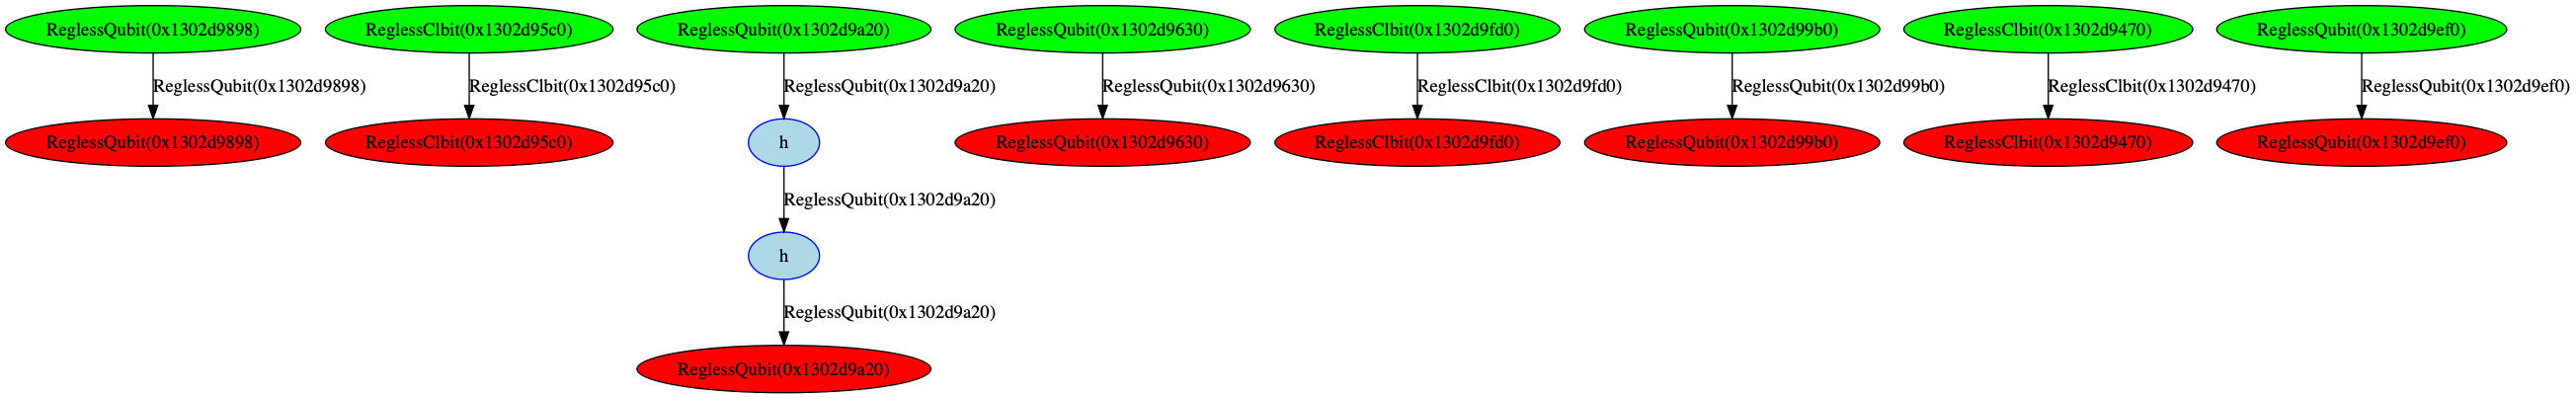

In [28]:
dag.draw()

In [29]:
list(dag.layers())

[{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x130454550>,
  'partition': [[ReglessQubit(0x1302d9a20)]]},
 {'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x130454630>,
  'partition': [[ReglessQubit(0x1302d9a20)]]}]

In [30]:
qc.mark_registers((0,2,4), 'foo')

QuantumRegister(3, 'foo')

In [31]:
qc.qregs

{QuantumRegister(3, 'foo')}

In [32]:
list(qc.qregs)[0][:]

[ReglessQubit(0x1302d9a20),
 ReglessQubit(0x1302d99b0),
 ReglessQubit(0x1302d9ef0)]

In [33]:
qc.mark_registers([qc.qubits[1], qc.qubits[3]], name='bar')

QuantumRegister(2, 'bar')

In [34]:
qc.qregs

{QuantumRegister(2, 'bar'), QuantumRegister(3, 'foo')}

In [43]:
h_broad = qk.QuantumCircuit(5)
h_broad.h(h_broad.qubits[0])
print(h_broad)

                               ┌───┐
ReglessQubit(0x13045bc50)_: |0>┤ H ├
                               └───┘
ReglessQubit(0x13045b9b0)_: |0>─────
                                    
ReglessQubit(0x13045bb00)_: |0>─────
                                    
ReglessQubit(0x13045b898)_: |0>─────
                                    
ReglessQubit(0x13045b940)_: |0>─────
                                    


In [44]:
cx_tile = qk.QuantumCircuit(5)
for i in range(4):
    cx_tile.cx(i, i+1)
print(cx_tile)

                                                   
ReglessQubit(0x13045b5f8)_: |0>──■─────────────────
                               ┌─┴─┐               
ReglessQubit(0x13045b6d8)_: |0>┤ X ├──■────────────
                               └───┘┌─┴─┐          
ReglessQubit(0x13045b9e8)_: |0>─────┤ X ├──■───────
                                    └───┘┌─┴─┐     
ReglessQubit(0x13045bbe0)_: |0>──────────┤ X ├──■──
                                         └───┘┌─┴─┐
ReglessQubit(0x13045b828)_: |0>───────────────┤ X ├
                                              └───┘


In [45]:
th = qk.circuit.Parameter('theta')
qc = qk.QuantumCircuit(5,1)
qc.append(h_broad, range(5))

In [46]:
print(qc)

                               ┌───────────┐
ReglessQubit(0x11aa2eb38)_: |0>┤0          ├
                               │           │
ReglessQubit(0x11aa2eac8)_: |0>┤1          ├
                               │           │
ReglessQubit(0x131775240)_: |0>┤2 Circuit5 ├
                               │           │
ReglessQubit(0x1317754a8)_: |0>┤3          ├
                               │           │
ReglessQubit(0x13045bda0)_: |0>┤4          ├
                               └───────────┘
 ReglessClbit(0x13045b0b8)_: 0 ═════════════
                                            


In [47]:
qc.append(cx_tile, [0,1,2,3,4])

In [48]:
qc.rz(th, qc.qubits)

In [49]:
qc.append(cx_tile.mirror(), [0,1,2,3,4])

In [50]:
print(qc)

                               ┌───────────┐┌───────────┐┌───────────┐»
ReglessQubit(0x11aa2eb38)_: |0>┤0          ├┤0          ├┤ Rz(theta) ├»
                               │           ││           │├───────────┤»
ReglessQubit(0x11aa2eac8)_: |0>┤1          ├┤1          ├┤ Rz(theta) ├»
                               │           ││           │├───────────┤»
ReglessQubit(0x131775240)_: |0>┤2 Circuit5 ├┤2 Circuit6 ├┤ Rz(theta) ├»
                               │           ││           │├───────────┤»
ReglessQubit(0x1317754a8)_: |0>┤3          ├┤3          ├┤ Rz(theta) ├»
                               │           ││           │├───────────┤»
ReglessQubit(0x13045bda0)_: |0>┤4          ├┤4          ├┤ Rz(theta) ├»
                               └───────────┘└───────────┘└───────────┘»
 ReglessClbit(0x13045b0b8)_: 0 ═══════════════════════════════════════»
                                                                      »
«                            ┌──────────────────┐
«ReglessQubit(

In [51]:
print(qc.decompose())

AttributeError: 'ReglessQubit' object has no attribute 'register'